In [1]:
import pandas 


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from zipfile import ZipFile
import io
import requests

# Load the dataset from the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download the ZIP file
response = requests.get(url)
zip_file = ZipFile(io.BytesIO(response.content))

# Extract the CSV file
csv_file = zip_file.open('bank-additional/bank-additional-full.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file, sep=';')

# Display the first few rows of the dataset
df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df_encoded.drop('y_yes', axis=1)  # Features
y = df_encoded['y_yes']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8868657441126487
Confusion Matrix:
[[6817  486]
 [ 446  489]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



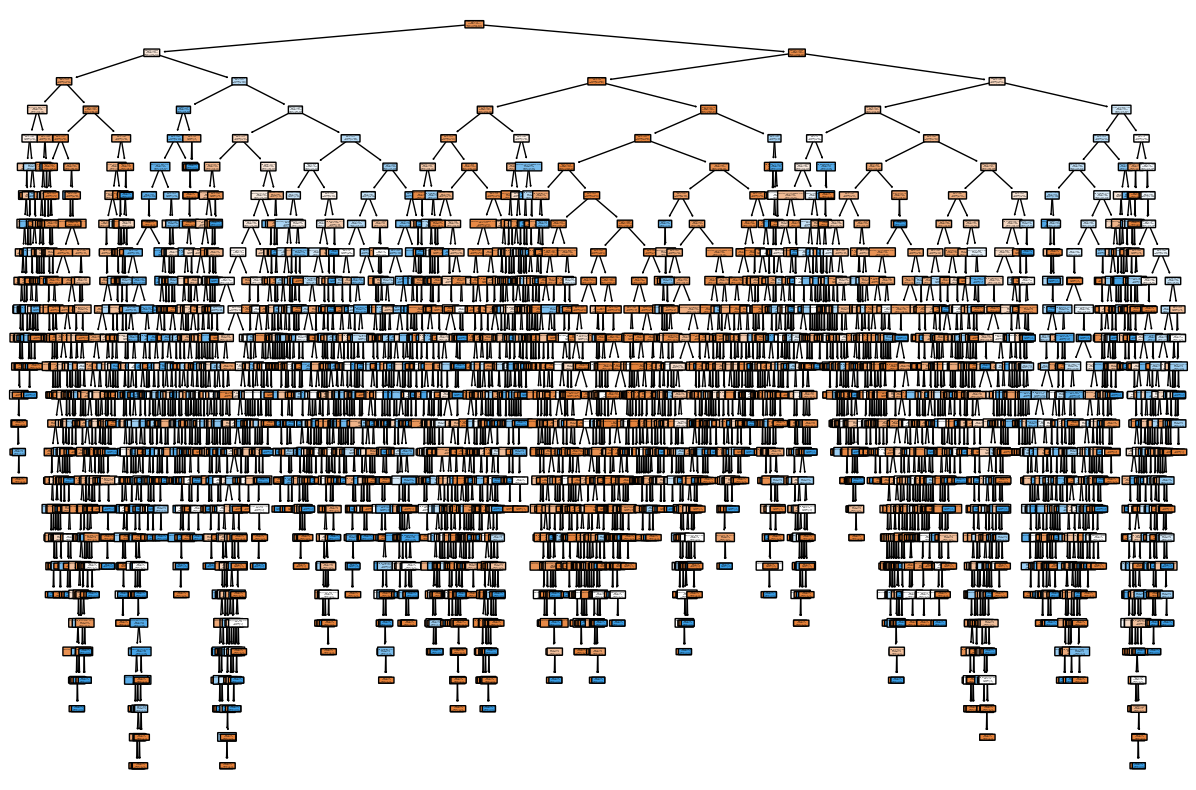

In [16]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True)
plt.show()



In [18]:
# Get feature importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance)


                          Feature  Importance
1                        duration    0.350887
9                     nr.employed    0.155049
0                             age    0.088462
8                       euribor3m    0.077975
2                        campaign    0.029592
7                   cons.conf.idx    0.025075
3                           pdays    0.024437
34                    housing_yes    0.014446
6                  cons.price.idx    0.012088
4                        previous    0.011702
47                day_of_week_mon    0.011436
29    education_university.degree    0.011333
50                day_of_week_wed    0.011100
36                       loan_yes    0.010316
49                day_of_week_tue    0.009637
21                marital_married    0.008803
31                default_unknown    0.008627
25             education_basic.9y    0.008450
18                 job_technician    0.008203
26          education_high.school    0.008114
45                      month_oct 

In [26]:
print(training_features)




Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [27]:
print(new_data.columns)


Index(['age', 'job_blue-collar', 'marital_married', 'education_basic.9y',
       'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact_telephone',
       'day_of_week_mon'],
      dtype='object')


In [30]:
print(new_data.columns)



Index(['age', 'job_blue-collar', 'marital_married', 'education_basic.9y',
       'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact_telephone',
       'day_of_week_mon'],
      dtype='object')


In [33]:
new_predictions = clf.predict(new_data)
print(new_predictions)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- contact
- day_of_week
- default
- education
- housing
- ...
Feature names seen at fit time, yet now missing:
- contact_telephone
- day_of_week_mon
- day_of_week_thu
- day_of_week_tue
- day_of_week_wed
- ...
